# ディリクレ級数の滑らかなカットオフ

黒木玄

2018-08-12

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT
* Repository: https://github.com/genkuroki/Calculus

このファイルは次の場所できれいに閲覧できる:

http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/A01%20Smooth%20cutoff%20of%20Dirichlet%20series.ipynb

このノートの元ネタは次のリンク先の式(26)以降の解説である:

* Terence Tao, <a href="https://terrytao.wordpress.com/2010/04/10/the-euler-maclaurin-formula-bernoulli-numbers-the-zeta-function-and-real-variable-analytic-continuation/">The Euler-Maclaurin formula, Bernoulli numbers, the zeta function, and real-variable analytic continuation</a>, What's new, 2010-04-10

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mellin変換とその逆変換" data-toc-modified-id="Mellin変換とその逆変換-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mellin変換とその逆変換</a></span><ul class="toc-item"><li><span><a href="#Mellin変換" data-toc-modified-id="Mellin変換-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Mellin変換</a></span></li><li><span><a href="#逆Mellin変換" data-toc-modified-id="逆Mellin変換-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>逆Mellin変換</a></span></li></ul></li><li><span><a href="#Dirichlet級数の滑らかなカットオフ" data-toc-modified-id="Dirichlet級数の滑らかなカットオフ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dirichlet級数の滑らかなカットオフ</a></span><ul class="toc-item"><li><span><a href="#滑らかなカットオフの定義" data-toc-modified-id="滑らかなカットオフの定義-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>滑らかなカットオフの定義</a></span></li><li><span><a href="#滑らかなカットオフの逆Mellin変換表示" data-toc-modified-id="滑らかなカットオフの逆Mellin変換表示-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>滑らかなカットオフの逆Mellin変換表示</a></span></li><li><span><a href="#Re-s-&lt;-0-および-s-=-0-での様子" data-toc-modified-id="Re-s-<-0-および-s-=-0-での様子-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Re s &lt; 0 および s = 0 での様子</a></span></li></ul></li><li><span><a href="#滑らかなカットオフの例" data-toc-modified-id="滑らかなカットオフの例-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>滑らかなカットオフの例</a></span><ul class="toc-item"><li><span><a href="#ζ(s)の場合" data-toc-modified-id="ζ(s)の場合-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ζ(s)の場合</a></span></li><li><span><a href="#-ζ'(s)の場合" data-toc-modified-id="-ζ'(s)の場合-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>-ζ'(s)の場合</a></span></li><li><span><a href="#-(d/ds)log-ζ(s)の場合" data-toc-modified-id="-(d/ds)log-ζ(s)の場合-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>-(d/ds)log ζ(s)の場合</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

using Primes
ENV["LINES"] = 100

using HTTP
;

## Mellin変換とその逆変換

以下, 収束性の詳細のこだわらずにラフに説明する.

### Mellin変換

函数 $f(x)$ に対して,

$$
F(s) = \int_0^\infty f(x) x^{s-1}\,dx
$$

を $f(x)$ の**Mellin変換**と呼ぶ.  $f(x)$ が $\R$ 上の急減少函数で $\real s>0$ ならば右辺の積分は絶対収束する. $f(x)$ が $\R$ 上の急減少函数で $\real s>0$ のとき, 部分積分によって,

$$
F(s) = 
\left[f(x)\frac{x^s}{s}\right]_0^\infty - 
\frac{1}{s}\int_0^\infty f'(x) x^s\,dx = -
\frac{1}{s}\int_0^\infty f'(x) x^s\,dx.
$$

さらに右辺の積分因子は $\real s>-1$ で絶対収束するので $F(s)$ は $\real s > -1$ に解析接続され, $s=0$ に極を持つ可能性がある. この操作を繰り返すことによって, 

$$
F(s) = \frac{(-1)^n}{s(s+1)\cdots(s+n-1)}\int_0^\infty f^{(n)}(x)x^{s+n-1}\,dx.
$$

これより, $F(s)$ は複素平面全体の有理型函数に解析接続され, その極は $s=0,-1,-2,\ldots$ に含まれる.

**例:** $f(x)=e^{-x^2}$ のとき, $x=y^{1/2}$ とおくと,

$$
F(s) = 
\int_0^\infty e^{-x^2}x^{s-1}\,dx =
\frac{1}{2}\int_0^\infty e^{-y}y^{s/2-1}\,dy =
\frac{1}{2}\Gamma\left(\frac{s}{2}\right)
$$

でガンマ函数 $\Gamma(s/2)$ の極の全体は $s/2=0,-1,-2,\ldots$ に一致するので, $F(s)$ の極の全体は $0$ 以下の偶数全体に一致する. $\QED$

**例:** $f(x)$ は急減少函数でかつ $0<\delta<\delta_0$ であり, $|x|\leqq \delta_0$ ならば $f(x)=1$ であると仮定する. このとき, $\real s > 0$ ならば, 

$$
F(s) = -\frac{1}{s}\int_\delta^\infty f'(x) x^s\,dx.
$$

でかつ右辺の積分因子 $\ds \int_\delta^\infty f'(x) x^s\,dx$ は任意の複素数 $s$ について絶対収束しているので, $F(s)$ の極になっている可能性がある点は $s=0$ の1つだけである. $\QED$

In [2]:
eta(x) = exp(-x^2)
x = symbols("x", real=true)
s = symbols("s", positive=true)
integrate(eta(x)*x^(s-1), (x,0,oo))

     /s\
Gamma|-|
     \2/
--------
   2    

### 逆Mellin変換

$f(x)$ は急減少函数でかつ $F(s)$ はそのMellin変換であるとする:

$$
F(s) = \int_0^\infty f(x)x^{s-1}\,dx.
$$

$x = e^y$ とおくと, $dx/x = dy$ より,

$$
F(s) = \int_\R f(e^y)e^{sy}\,dy.
$$

$s = a+it$, $a>0$, $t\in\R$ とおくと,

$$
F(a+it) = 
\int_\R f(e^y)e^{(a+it)y}\,dy =
\int_\R f(e^y)e^{ay} e^{ity}\,dy.
$$

$y\to-\infty$ で $f(e^y)$ が有界で $e^{ay}$ が急減少し, $y\to\infty$ で $f(e^y)$ は(その導函数も含めて)どのような $e^{ky}$ よりも急速に $0$ に収束するので,  $y\in\R$ の函数として $f(e^y)e^{ay}$ は急減少函数になることに注意せよ. ゆえに, $t\in\R$ の函数としてそのFourier逆変換 $F(a+it)$ も急減少函数になる(急減少函数全体の空間はFourier変換および逆変換で閉じている). さらに, そのことから部分積分によって解析接続した結果の $F(s)$ も虚軸方向について急減少函数になることがわかる.

Fourier変換とその逆変換の理論より,

$$
f(e^y)e^{ay} = \frac{1}{2\pi}\int_\R F(a+it) e^{-ity}\,dt
$$

すなわち

$$
f(e^y) = \frac{1}{2\pi}\int_\R F(a+it) e^{-(a+it)y}\,dt.
$$

したがって, $s=a+it$ とおくと,

$$
f(e^y) = \frac{1}{2\pi i} \int_{a-i\infty}^{a+i\infty} F(s) e^{-sy}\,ds.
$$

さらに, $x=e^y$ とおくと,

$$
f(x) = \frac{1}{2\pi i} \int_{a-i\infty}^{a+i\infty} F(s) x^{-s}\,ds.
$$

右辺を $F(s)$ の**逆Mellin変換**と呼ぶ.

**注意:** $f(x)$ に不連続点がある場合には左辺の $f(x)$ を不連続点 $x$ での値を片側極限の平均 $\ds\frac{f(x-0)+f(x+0)}{2}$ に修正した $f_*(x)$ に置き換えなければいけない. $f_*(x)$ の正確な定義は以下の通り. 詳しくはFourier変換論における**Diniの条件**について確認せよ. $\QED$

**補足:** 以上の状況のもとで, $F(s)$ の $s=0$ での留数を $r$ と書き, $-1$ 以下の $F(s)$ の極で最大のものを $B$ とし, $B<b<0$ と仮定する. このとき, 留数定理より, $x>0$ ならば

$$
f(x) = 
r + \frac{1}{2\pi i}\int_{b-i\infty}^{b+i\infty} F(s)x^{-s}\,ds = r + O(x^{-b}) \qquad (x\to\infty).
$$

逆Mellin変換表示された函数についてこの議論はよく使われる. $\QED$

## Dirichlet級数の滑らかなカットオフ

### 滑らかなカットオフの定義

$\eta(x)$ は急減少函数で $\eta(0)=1$, $\eta'(0)=0$ を満たすものであると仮定する.

Dirichlet級数

$$
Z(s) = \sum_{n=1}^\infty a_n n^{-s}
$$

は $\real s \geqq a$ で絶対収束しており, 複素平面全体に有理型函数として解析接続されると仮定する.

$N>0$ に対して,

$$
Z_\eta(N,s) = \sum_{n=1}^\infty a_n n^{-s}\eta\left(\frac{n}{N}\right)
$$

とおく. これを Dirichlet級数 $Z(s)$ の**滑らかなカットオフ函数** $\eta(x)$ による**滑らかなカットオフ**と呼ぶ. $\real s \geqq a$ ならば $N\to\infty$ のとき $Z_\eta(N,s)\to Z(s)$ となる.

### 滑らかなカットオフの逆Mellin変換表示

カットオフ函数 $\eta(x)$ のMellin変換を $H(s)$ と書く:

$$
H(s) = \int_0^\infty \eta(x)x^{s-1}\,dx.
$$

$H(s)$ は虚軸方向に急減少する函数になり, $a>0$, $x>0$ ならば

$$
\eta(x) = 
\frac{1}{2\pi i}\int_{a-i\infty}^{a+i\infty} H(t)x^{-t}\,dt.
$$

十分大きな $a>0$ について, 

$$
\begin{aligned}
Z_\eta(N,s) &= 
\sum_{n=1}^\infty a_n n^{-s}\eta\left(\frac{n}{N}\right) =
\sum_{n=1}^\infty a_n n^{-s}
\frac{1}{2\pi i}\int_{a-i\infty}^{a+i\infty} H(t)\left(\frac{n}{N}\right)^{-t}\,dt 
\\ &=
\frac{1}{2\pi i}\int_{a-i\infty}^{a+i\infty} H(t)N^t\,Z(s+t)\,dt.
\end{aligned}
$$

**注意:** $\eta(0)=1$ より, $\real s > -1$ のとき, 

$$
H(s) = -\frac{1}{s}\int_0^\infty \eta'(x)x^s\,dx, 
\quad -\int_0^\infty \eta'(x)\,dx = \eta(0) = 1
$$

より, $H(s)$ の $s=0$ での留数は $1$ である. $\QED$

### Re s < 0 および s = 0 での様子

$a>0$ は十分大きいと仮定し, $b<0$ であると仮定する. $b\leqq\real t<a$ における $H(t)$ の極は $t=0$ だけであり, $t$ の函数としての $Z(s+t)$ の同じ範囲内の極の全体は $s+t=\rho_1,\rho_2,\ldots$ であり, どれも1位の極であり, それぞれの留数は $r_1,r_2,\ldots$ であると仮定する. このとき, 

$$
\begin{aligned}
&
Z_\eta(N,s) = 
\frac{1}{2\pi i}\int_{a-i\infty}^{a+i\infty} H(t)N^t\,Z(s+t)\,dt, 
\\ &
\frac{1}{2\pi i}\int_{b-i\infty}^{b+i\infty} H(t)N^t\,Z(s+t)\,dt = O(N^b) \quad(N\to\infty)
\end{aligned}
$$

と留数定理より,

$$
Z_\eta(N,s) =
\sum_{n=1}^\infty a_n n^{-s}\eta\left(\frac{n}{N}\right) = 
Z(s) + \sum_j r_j H(\rho_j-s)N^{\rho_j-s} + O(N^b).
$$

$b<0$ なので $O(N^b)$ の項は $N\to 0$ で $0$ に収束する. $N$ に関する定数項は $Z(s)$ になり, カットオフ函数の取り方によらない.  特に $s=0$ のとき, 

$$
Z_\eta(N,0) = \sum_{n=1}^\infty a_n \eta\left(\frac{n}{N}\right) = 
Z(0) + \sum_j r_j H(\rho_j)N^{\rho_j} + O(N^b). 
$$

## 滑らかなカットオフの例

### ζ(s)の場合

$\ds Z(s) = \zeta(s)=\sum_{n=1}^\infty n^{-s}$ のとき, $t$ の函数としての $\zeta(s+t)$ の極は $s+t=1$ だけであり, そこでの留数は $1$ なので, ある $b<0$ が存在して, 

$$
\sum_{n=1}^\infty a_n n^{-s}\eta\left(\frac{n}{N}\right) = 
\zeta(s) + H(1-s)N^{1-s} + O(N^b).
$$

このように, 滑らかなカットオフは $N\to\infty$ における定数項 $\zeta(s)$ と発散項 $H(1-s)N^{1-s}$ と $0$ に収束する項に分解される. 

例えば $\eta(x)=e^{-x^2}$ のとき $\ds H(s) = \frac{1}{2}\Gamma\left(\frac{s}{2}\right)$ であり, $H(s)$ の極は0以下の偶数にしかないので, $b=-1$ に取れる:

$$
\sum_{n=1}^\infty a_n n^{-s}\exp\left(-\frac{n^2}{N^2}\right) = 
\zeta(s) + \frac{1}{2}\Gamma\left(\frac{1-s}{2}\right)N^{1-s} + O(N^{-1}).
$$

例えば, $\eta(x)$ が $x=0$ の近傍で $1$ になるならば(すなわち, ある $\delta>0$ が存在して $|x|\leqq\delta$ ならば $\eta(x)=1$ となるならば), $b$ は幾らでも小さく取れて, $0$ に収束する項 $O(N^b)$ の部分は $N$ について急減少することになる. 

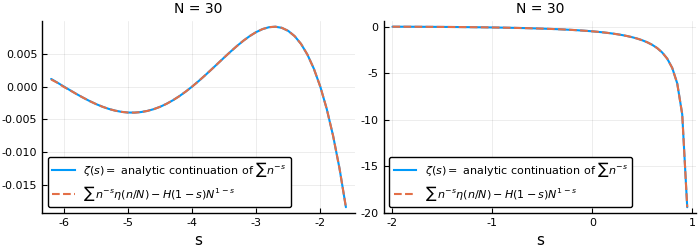

In [3]:
# 実軸上のプロット

eta(x) = exp(-x^2)
H(s) = gamma(s/2)/2
CutoffZeta(s; N=30, L=10^5) = (ss = float(s); sum(n-> n^(-float(ss))*eta(n/N), 1:L))
DivergentTerm(s; N=30) = (ss = float(s); H(1-ss)*N^(1-ss))
CutoffZeta0(s; N=30, L=10^5) = CutoffZeta(s; N=N, L=L) - DivergentTerm(s; N=N)

pyplot()
PP = []
for s in [-6.2:0.1:-1.6, -2.0:0.05:0.95, 1.3:0.07:4.0, 3.8:0.07:10]
    P = plot(title="N = 30", titlefontsize=10, xlabel="s")
    plot!(s, zeta.(s), label="\$\\zeta(s) =\$ analytic continuation of \$\\sum n^{-s}\$", lw=1.5)
    plot!(s, CutoffZeta0.(s), label="\$\\sum\\,n^{-s}\\eta(n/N) - H(1-s)N^{1-s}\$", ls=:dash, lw=1.5)
    push!(PP, P)
end
plot(PP[1:2]..., size=(700, 250), legend=:bottomleft)

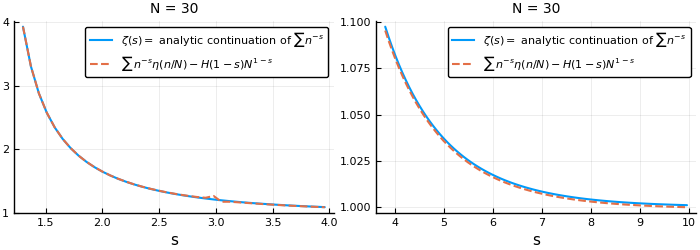

In [4]:
plot(PP[3:4]..., size=(700, 250), legend=:topright)

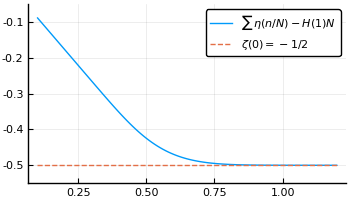

In [5]:
# ζ(0) = "1+1+1+…" = -1/2

Ns = 0.1:0.01:1.2
y = (N->CutoffZeta0(0.0, N=N)).(Ns)
plot(size=(350,200), xlanel="N")
plot!(Ns, y, label="\$\\sum\\,\\eta(n/N) - H(1)N\$")
plot!(Ns, zeta(0.0)*ones(Ns), label="\$\\zeta(0) = -1/2\$", ls=:dash)
plot!(ylims=(-0.55,-0.05))

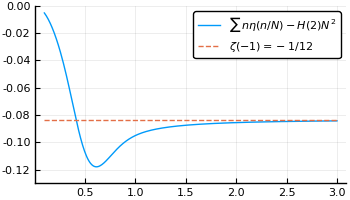

In [6]:
# ζ(-1) = "1+2+3+…" = -1/12

Ns = 0.1:0.01:3.0
y = (N->CutoffZeta0(-1.0, N=N)).(Ns)
P1 = plot(size=(350,200), xlanel="N")
plot!(Ns, y, label="\$\\sum\\,n\\eta(n/N) - H(2)N^2\$")
plot!(Ns, zeta(-1.0)*ones(Ns), label="\$\\zeta(-1) = -1/12\$", ls=:dash)
plot!(ylims=(-0.13, 0))

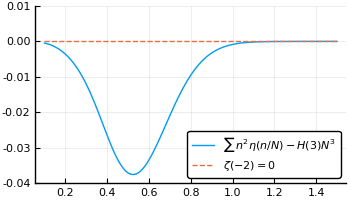

In [7]:
# ζ(-2) = "1^2+2^2+3^2+…" = 0

Ns = 0.1:0.01:1.5
y = (N->CutoffZeta0(-2.0, N=N)).(Ns)
P1 = plot(size=(350,200), xlanel="N")
plot!(Ns, y, label="\$\\sum\\,n^2\\eta(n/N) - H(3)N^3\$")
plot!(Ns, zeta(-2.0)*ones(Ns), label="\$\\zeta(-2) = 0\$", ls=:dash)
plot!(ylims=(-0.04, 0.01))

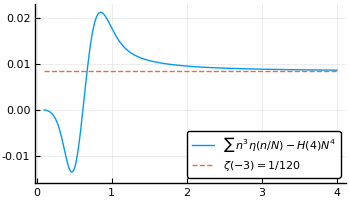

In [8]:
# ζ(-3) = "1^3+2^3+3^3+…" = 1/120

Ns = 0.1:0.01:4
y = (N->CutoffZeta0(-3.0, N=N)).(Ns)
P1 = plot(size=(350,200), xlanel="N")
plot!(Ns, y, label="\$\\sum\\,n^3\\eta(n/N) - H(4)N^4\$")
plot!(Ns, zeta(-3.0)*ones(Ns), label="\$\\zeta(-3) = 1/120\$", ls=:dash)
plot!(ylims=(-0.016, 0.023), legend=:bottomright)

  5.076214 seconds (110.87 k allocations: 5.756 MiB)


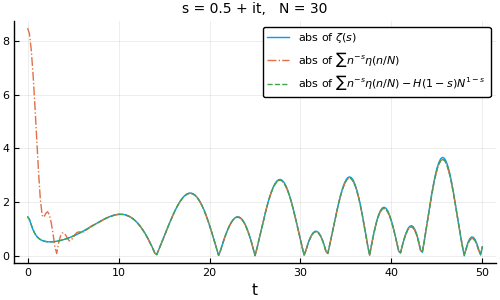

In [9]:
# critical line 上のプロット

pyplot()
t = 0.0:0.2:50.0
s = 0.5 .+ im .* t
@time z = CutoffZeta.(s)
w = z .- DivergentTerm.(s)
P = plot(size=(500, 300))
plot!(legend=:topright, xlabel="t")
plot!(title="s = 0.5 + it,   N = 30", titlefontsize=10)
plot!(t, abs.(zeta.(s)), label="abs of \$\\zeta(s)\$")
plot!(t, abs.(z), label="abs of \$\\sum n^{-s}\\eta(n/N)\$", ls=:dashdot)
plot!(t, abs.(w), label="abs of \$\\sum n^{-s}\\eta(n/N) - H(1-s)N^{1-s}\$", ls=:dash)

$H(s)$ (の絶対値)が虚軸方向に急減少するので, 発散項 $H(1-s)N^{1-s}$ は $s$ の虚部が大きいときに無視できる. そのおかげで, 発散項を引き去る前の滑らかなカットオフ $\ds \sum_{n=1}^\infty n^{-s}\eta\left(\frac{n}{N}\right)$ で $\real s=1/2$, $\imag s > 10$ における $\zeta(s)$ をよく近似できる.

### -ζ'(s)の場合

$\ds Z(s) = -\zeta'(s) = -\sum_{n=1}^\infty n^{-s}\log n$ の場合を考える. $-\zeta'(s)$ は $s=1$ で

$$
-\zeta'(s)=\frac{1}{(s-1)^2}+\gamma_1+\gamma_2(s-1)+\cdots
$$

とLaurent展開される. $s=1$ で2位の極なので上で作った公式をそのまま使用することはできないが, 同様の議論によって次が得られる.  ある $b<0$ が存在して, 

$$
\sum_{n=1}^\infty n^{-s}\log n\cdot\eta\left(\frac{n}{N}\right) =
-\zeta'(s) + H(1-s)N^{1-s}\log N + H'(1-s)N^{1-s} + O(N^b).
$$

特に $s=0$ のとき,

$$
\sum_{n=1}^\infty \log n\cdot\eta\left(\frac{n}{N}\right) =
-\zeta'(0) + H(1)N\log N + H'(1)N + O(N^b).
$$

すなわち, 左辺から発散項を除いて残る定数項はカットオフ函数 $\eta(x)$ の取り方によらず $-\zeta'(0)$ であることがわかる.

$$
-\zeta'(0)=\log\sqrt{2\pi}
$$

であることがよく知られている.  以上の内容は本質的に階乗に関するStirlingの近似公式であるとも考えられる. 

In [10]:
H(s) = gamma(s/2)/2
s = symbols("s")
diff(H(s), s) |> display
H1(s) = gamma(s/2)*digamma(s/2)/4
H1(Sym(1)) |> display
@show H1(1);

     /s\          /   s\
Gamma|-|*polygamma|0, -|
     \2/          \   2/
------------------------
           4            

  ____                         
\/ pi *(-2*log(2) - EulerGamma)
-------------------------------
               4               

H1(1) = -0.8700577267283156


10-element Array{Tuple{Int64,Float64,Float64},1}:
 (1, 0.0128312, 0.0488808)
 (2, 0.399516, 0.407394)  
 (3, 1.22619, 1.22962)    
 (4, 2.35107, 2.35299)    
 (5, 3.69906, 3.70029)    
 (6, 5.22518, 5.22603)    
 (7, 6.89954, 6.90016)    
 (8, 8.70086, 8.70133)    
 (9, 10.6132, 10.6136)    
 (10, 12.6242, 12.6245)   

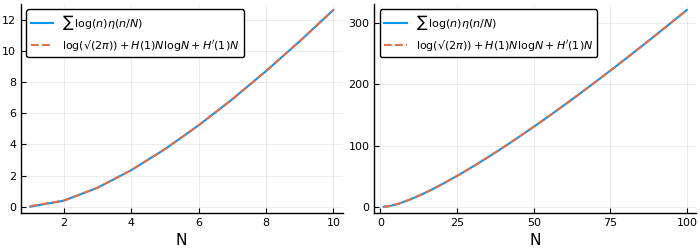

In [11]:
eta(x) = exp(-x^2)
CutoffLogSum(N; L=10^6) = sum(n->log(n)*eta(n/N), 1:L)
ApproxSum(N) = log(√(2π)) + H(1)*N*log(N) + H1(1)*N

[(N, CutoffLogSum(N), ApproxSum(N)) for N in 1:10] |> display

pyplot()
PP = []
for Ns in [1:10, 1:100]
    P = plot(legend=:topleft, xlabel="N")
    plot!(Ns, CutoffLogSum.(Ns), label="\$\\sum\\,\\log(n)\\eta(n/N)\$", lw=1.5)
    plot!(Ns, ApproxSum.(Ns), label="\$\\log(√(2π)) + H(1)N\\log N + H'(1)N\$", ls=:dash, lw=1.5)
    push!(PP, P)
end
plot(PP..., size=(700,250))

### -(d/ds)log ζ(s)の場合

$\ds Z(s)=-\frac{d}{ds}\log\zeta(s)=-\frac{\zeta'(s)}{\zeta(s)}$ の場合を考えよう. $\zeta(s)$ はEuler積表示

$$
\zeta(s) = \prod_p (1-p^{-s})^{-1} \quad (\real s > 1)
$$

を持つ. ここで $p$ は素数全体を走る. これより, 非常によく使われる対数函数のTayloe展開

$$
-\log(1-x) = \sum_{k=1}^\infty\frac{x^k}{k} \quad (|x|<1)
$$

より

$$
\log\zeta(s) = -\sum_p\log(1-p^{-s}) =
\sum_p\sum_{k=1}^\infty \frac{p^{-ks}}{k} =
\sum_{n=1}^\infty \frac{\Lambda(n)}{\log n}n^{-s}.
$$

ここで $\Lambda(n)$ は所謂 von Mangoldt 函数である:

$$
\Lambda(n) = 
\begin{cases}
\log p & (n=p^k,\ \text{$p$ is prime},\ k\in\Z_{>0}), \\
0      & (\text{otherwise}).
\end{cases}
$$

ゆえに

$$
-\frac{d}{ds}\log\zeta(s) = -\frac{\zeta'(s)}{\zeta(s)} =
\sum_p\sum_{k=1}^\infty p^{-ks}\log p =
\sum_{n=1}^\infty \Lambda(n)n^{-s}.
$$

$\ds Z(s)=-\frac{d}{ds}\log\zeta(s)$ の極はすべて1位であり, それら全体は $\zeta(s)$ の極と零点の全体に一致する. ゆえに

$$
\zeta(0) = -\frac{1}{2}, \quad
-\zeta'(0) = \log\sqrt{2\pi}, \quad
-\frac{\zeta'(0)}{\zeta(0)} = -\log(2\pi)
$$

より, $a=2$, $b=-1$ とすると, 

$$
\sum_{n=1}^\infty \Lambda(n)\eta\left(\frac{n}{N}\right) = 
-\log(2\pi) + H(1) N - \sum_{j=1}^\infty H(\rho_j)N^{\rho_j} + O(N^{-1}). 
$$

ここで, $\rho_j$ は $0\leqq \real s\leqq 1$ における $\zeta(s)$ の零点の全体である. 

10-element Array{Tuple{Int64,Float64,Float64},1}:
 (1, 0.0128311, -0.95165) 
 (2, 0.386599, -0.0654232)
 (3, 1.07492, 0.820804)   
 (4, 1.87012, 1.70703)    
 (5, 2.7074, 2.59326)     
 (6, 3.56407, 3.47948)    
 (7, 4.43125, 4.36571)    
 (8, 5.30428, 5.25194)    
 (9, 6.18094, 6.13817)    
 (10, 7.06015, 7.02439)   

log(2π) = 1.8378770664093453
Eta(1) = 0.886226925452758


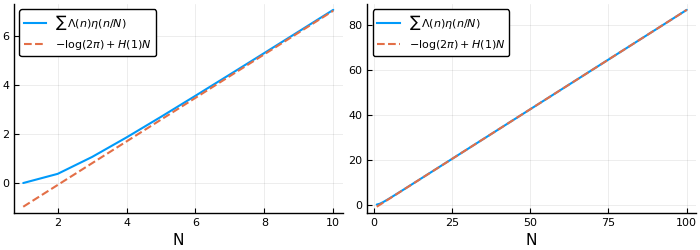

In [12]:
#  von Mangoldt 函数 Λ(n) のカットオフを入れた和の計算

eta(x) = exp(-x^2)
Eta(x) = gamma(x/2)/2

function vonMangoldtCutoffSum(N; L=10^6)
    c = 0.0
    for p in primes(L)
        for k in 1:floor(Int,log(p,L))
            c += log(p) * eta(p^k/N)
        end
    end
    c
end

ApproximateCutoffSum(N) = -log(2π) + Eta(1)*N
@show log(2π)
@show Eta(1)

[(N, vonMangoldtCutoffSum(N), ApproximateCutoffSum(N)) for N in 1:10] |> display

pyplot()
PP = []
for Ns in [1:10, 1:100]
    P = plot(legend=:topleft, xlabel="N")
    plot!(Ns, vonMangoldtCutoffSum.(Ns), label="\$\\sum\\,\\Lambda(n)\\eta(n/N)\$", lw=1.5)
    plot!(Ns, ApproximateCutoffSum.(Ns), label="\$-\\log(2\\pi)+H(1)N\$", ls=:dash, lw=1.5)
    push!(PP, P)
end
plot(PP..., size=(700,250))

**注意:** $\rho_j$ を $0\leqq \real s\leqq 1$ における $\zeta(s)$ の虚部の絶対値が $j$ 番目に小さな零点であるとするとし, $\psi(x)$ を

$$
\psi(x) = \sum_{1\leqq n\leqq x} \Lambda(n), 
$$

と定め, $\psi(x)$ の不連続点 $x$ における値を $\ds\frac{\psi(x-0)+\psi(x-0)}{2}$ で訂正したものを $\psi_*(x)$ と書くと,

$$
\psi_*(x) = -\log(2π) + x - \sum_{j=1}^\infty\frac{x^{\rho_j}}{\rho_j} -\frac{1}{2}\log(1-x^2)
$$

が成立することがよく知られている(**von Mangoldtの明示公式**). こちらの明示公式の場合には $x^{\rho_j}$ の係数が $1/\rho_j$ であり, $\rho_j$ の虚部についてゆっくり減少する函数になってしまっている. そのため $\ds \sum_{j=1}^\infty\frac{x^{\rho_j}}{\rho_j}$ は足し上げる順序に依存する条件収束級数になっている.  それに対して, 上で示した

$$
\sum_{n=1}^\infty \Lambda(n)\eta\left(\frac{n}{N}\right) =
-\log(2\pi) + H(1)N - \sum_{j=1}^\infty H(\rho_j)N^{\rho_j} + O(N^{-1})
$$

における $H(s)$ は $s$ の虚部の函数として急減少函数になっている点が大きく違う. 

$0\leqq\real s\leqq 1$, $0\leqq \imag s\leqq T$ を満たす $\zeta(s)$ の(重複度を含めた)零点の個数 $N(T)$ については

$$
N(T) = \frac{T}{2\pi}\log\frac{T}{2\pi} - \frac{T}{2\pi} + O(\log T)
$$

が成立することが知られている. $\QED$

10-element Array{Tuple{Int64,Float64,Float64},1}:
 (1, 0.0, -0.837877)    
 (2, 0.693147, 0.162123)
 (3, 1.79176, 1.16212)  
 (4, 2.48491, 2.16212)  
 (5, 4.09434, 3.16212)  
 (6, 4.09434, 4.16212)  
 (7, 6.04025, 5.16212)  
 (8, 6.7334, 6.16212)   
 (9, 7.83201, 7.16212)  
 (10, 7.83201, 8.16212) 

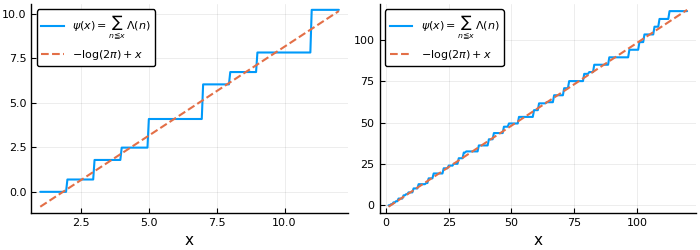

In [13]:
# ψ(x) = Σ_{n≦x} Λ(n) と -log(2π) + x をプロットして比較

function psi(x)
    c = 0.0
    for p in primes(floor(Int,x))
        for k in 1:floor(Int,log(p,x))
            c += log(p)
        end
    end
    c
end

approxpsi(x) = -log(2π) + x

[(N, psi(N), approxpsi(N)) for N in 1:10] |> display

pyplot()
PP = []
for x in [1:0.05:12, 1:0.5:120]
    P = plot(legend=:topleft, xlabel="x")
    plot!(x, psi.(x), label="\$\\psi(x)=\\sum_{n\\leqq x}\\,\\Lambda(n)\$", lw=1.5)
    plot!(x, approxpsi.(x), label="\$-\\log(2\\pi)+x\$", ls=:dash, lw=1.5)
    push!(PP, P)
end
plot(PP..., size=(700,250))

**注意:** $x$ 以下の素数の個数を $\pi(x)$ と書くとき, $\ds\pi(x)\sim\frac{x}{\log x}$ が成立するという結果は**素数定理**と呼ばれている.  $\psi(x)\sim x$ と素数定理は同値である. 上にプロットした結果はさらに定数項が $-\log(2\pi)$ になることを意味している. $\QED$

http://www.dtc.umn.edu/~odlyzko/zeta_tables/index.html にRiemannのゼータ函数の非自明な零点の虚部のリストが置いてある.

In [14]:
res = HTTP.get("http://www.dtc.umn.edu/~odlyzko/zeta_tables/zeros1", 
    readtimeout=60, retry=true, retries=20);

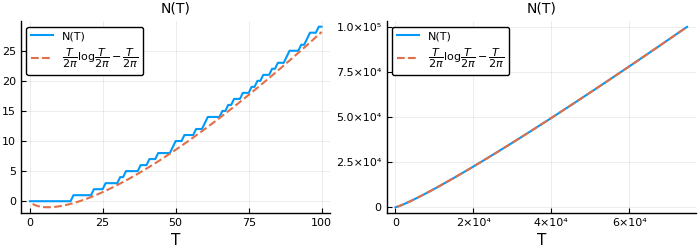

In [15]:
# Nzeros(T) = N(T) のプロット

zetazeros = parse.(Float64, split(String(res.body), "\n")[1:end-1])
NZeros(T) = count(zetazeros .≤ T)
AZeros(T) = T/(2π)*log(T/(2π)) - T/(2π)
maxT = maximum(zetazeros)

pyplot()
PP = []
for T in [0:100, 0:maxT/200:maxT]
    P = plot(legend=:topleft, xlabel="T")
    plot!(title="N(T)", titlefontsize=10)
    plot!(T, NZeros.(T), label="N(T)", lw=1.5)
    plot!(T, AZeros.(T), label="\$\\dfrac{T}{2\\pi}\\log\\dfrac{T}{2\\pi} - \\dfrac{T}{2\\pi}\$", 
        ls=:dash, lw=1.5)
    push!(PP, P)
end
plot(PP..., size=(700,250))